# Prep Bringing in Data and Libraries

https://www.kaggle.com/abedkhooli/duplicates-in-train-and-test
Take out the duplicates

change some of the categories to ordinal after the base model

Over sampling might need to be done because 2500 of the dependent variable are the same and this could create bias.Bethany knows how to do this and we will ask her how to do that. 

Will want to try max_cat = 12, 44, 29 see if this will help the RDF

Issue: I made a max_cat = 44 and X0_ID became relevant the rest of the 8 variables were eliminated when using rf importance, which is kind of interesting and more disapointing because if this was a real work assignment I would be dispointed that our categories make no difference beside having them for a record purpose. This would suggest that we would need to go to the drawing board and actaully figure out better ways to segergate those groups with industry professionals to be able to use this in a model. Again we don't even know what they are, but this is just me blabbing and acting like i have a clue in data science. 


DO EXTRAPLOATION ON THE TEST SET TO SEE IF WE CAN PREDICT THE TEST SET WITH THE TRAINING SET IF WE CAN THEN WE KNOW THAT THE TEST SET ISN"T A RANDOM SAMPLE AND WE NEED TO MAKE OUR TRAIN AND VALID SIMILAR TO THE TEST SET PROPTION TO DO WELL.


NOTE FOR DL the outlier might be something that we want to worry about, but I am not sure, but if we have time we can do that with the DL pretty easily with little to no effort and re-run the code. 

#### Essential Loadings 

In [1]:
%load_ext autoreload 
%autoreload 2

%matplotlib inline

In [1]:
#If you don't know what this is trust me don't worry about it and ignore it 
#This helped me with a couple of things, but this library is for Deep learning and you need GPU power to use it
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from scipy.cluster import hierarchy as hc

from sklearn import metrics
from sklearn.metrics import r2_score

from pdpbox import pdp
from plotnine import *

In [2]:
pwd

'C:\\Windows\\System32\\fastai\\tmp_Python_Projects\\ML_Projects'

#### Data Loading & Dependent Variable Cleaning

In [3]:
PATH = "data/benz/"

In [4]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False)

In [5]:
df_raw.shape

(4209, 378)

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000):
        with pd.option_context("display.max_columns", 1000):
            display(df)

In [7]:
display_all(df_raw.tail().transpose())

,4204,4205,4206,4207,4208
ID,8405,8406,8412,8415,8417
y,107.39,108.77,109.22,87.48,110.85
X0,ak,j,ak,al,z
X1,s,o,v,r,r
X2,as,t,r,e,ae
X3,c,d,a,f,c
X4,d,d,d,d,d
X5,aa,aa,aa,aa,aa
X6,d,h,g,l,g
X8,q,h,e,u,w


In [8]:
display_all(df_raw.head())

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [9]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

ID      0.0
X0      0.0
X1      0.0
X10     0.0
X100    0.0
X101    0.0
X102    0.0
X103    0.0
X104    0.0
X105    0.0
X106    0.0
X107    0.0
X108    0.0
X109    0.0
X11     0.0
X110    0.0
X111    0.0
X112    0.0
X113    0.0
X114    0.0
X115    0.0
X116    0.0
X117    0.0
X118    0.0
X119    0.0
X12     0.0
X120    0.0
X122    0.0
X123    0.0
X124    0.0
X125    0.0
X126    0.0
X127    0.0
X128    0.0
X129    0.0
X13     0.0
X130    0.0
X131    0.0
X132    0.0
X133    0.0
X134    0.0
X135    0.0
X136    0.0
X137    0.0
X138    0.0
X139    0.0
X14     0.0
X140    0.0
X141    0.0
X142    0.0
X143    0.0
X144    0.0
X145    0.0
X146    0.0
X147    0.0
X148    0.0
X15     0.0
X150    0.0
X151    0.0
X152    0.0
X153    0.0
X154    0.0
X155    0.0
X156    0.0
X157    0.0
X158    0.0
X159    0.0
X16     0.0
X160    0.0
X161    0.0
X162    0.0
X163    0.0
X164    0.0
X165    0.0
X166    0.0
X167    0.0
X168    0.0
X169    0.0
X17     0.0
X170    0.0
X171    0.0
X172    0.0
X173    0.0
X174

In [10]:
df_raw.shape

(4209, 378)

In [11]:
pd.value_counts(df_raw.X8),  pd.value_counts(df_raw.X8).count()

(j    277
 s    255
 f    243
 n    242
 i    237
 e    225
 r    219
 a    210
 w    196
 v    194
 b    190
 k    176
 o    163
 m    155
 g    130
 t    119
 u    119
 q    117
 h    117
 y    116
 x    105
 d    103
 l    101
 p    100
 c    100
 Name: X8, dtype: int64, 25)

In [12]:
pd.value_counts(df_raw.X3).count()

7

#### Data Charts

In [13]:
df_raw.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


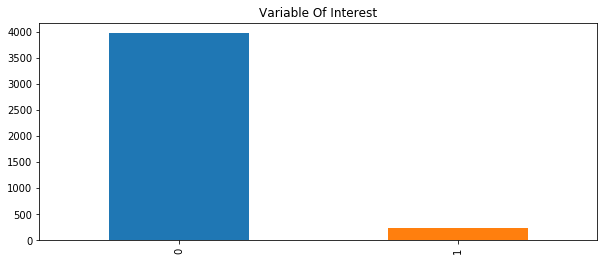

In [14]:
import matplotlib.pyplot as plt
pd.value_counts(df_raw.X376).plot(kind = 'bar', title ="Variable Of Interest", figsize=(10,4))

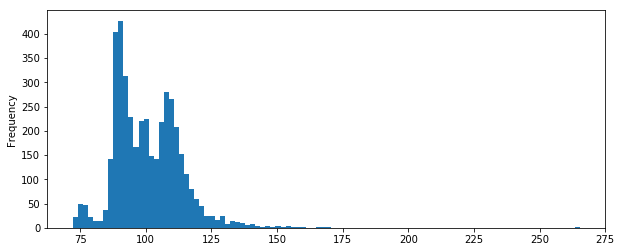

In [15]:
df_raw.y.plot(kind ='hist', figsize=(10,4), bins = 100)

#### Metric Socring

R^2 no need to do any changes to the dependent variable. Maybe do a transformation later, but for now we are going to stay the same. 

#####  Training Categories

In [17]:
train_cats(df_raw)

In [18]:
display_all(DataFrameSummary(df_raw).summary())

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209,4209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209
mean,4205.96,100.669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0133048,0,0.0750772,0.057971,0.42813,0.000475172,0.00261345,0.00760276,0.00784034,0.0995486,0.142789,0.00261345,0.0869565,0.02067,0.00190069,0.00498931,0.682585,0.0325493,0.0430031,0.00451414,0.232359,0.0111665,0.000237586,0.00546448,0.232359,0.00451414,0.232359,0.0332621,0.

In [19]:
# 12, 44, 29
df_trn, y_trn, nas = proc_df(df_raw, 'y')

In [1357]:
#This is a function that will split out data set
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 1262 #about 70% of the data
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((2947, 377), (2947,), (1262, 377))

# Random Forest Method

#### Base Model

In [852]:
#r2_score()

#Creating RMSE 
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
                      
#Creating scores for our model 
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [853]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 400 ms
[4.281087954398377, 10.524421574161758, 0.89186030489061996, 0.1980405206371236]


#### Bagging

In [854]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,1], np.mean(preds[:,1]), y_valid[1]

(array([  88.69,  108.24,  101.39,  110.8 ,   87.17,   89.17,   96.27,  101.07,   89.22,  128.93]),
 100.095,
 92.049999999999997)

In [855]:
preds.shape

(10, 1262)

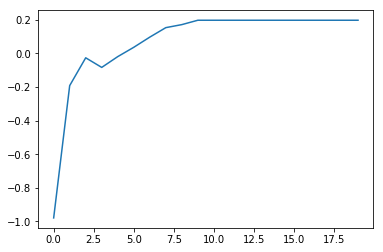

In [856]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

In [857]:
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[3.9220783749953774, 10.769484034210468, 0.90923688849937345, 0.16025824898167851]


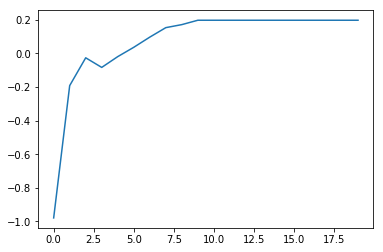

In [858]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(20)])

In [859]:
m = RandomForestRegressor(n_estimators = 100, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[3.492794349660359, 10.197696469627633, 0.92801817200102144, 0.24706044104541625]


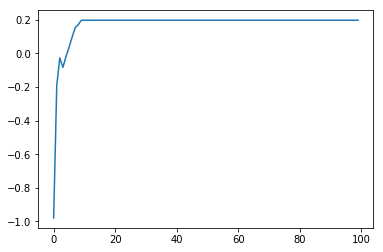

In [860]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(100)])

In [861]:
m = RandomForestRegressor(n_estimators = 500, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[3.491822963188379, 10.615157348380423, 0.92805820438991438, 0.18415280438829496]


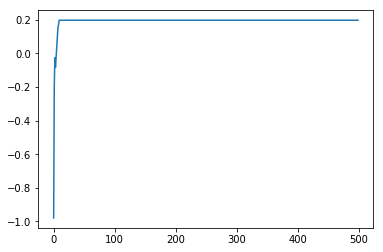

In [862]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis = 0)) for i in range(500)])

#### Subsampling

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a different random subset per tree. That way, given enough trees, the model can still see all the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

Besides Limiting the amount of data each tree can see with ('set_rf_sample()'). We might want to require a number of observations in leaf node: 

**Two Benifits**

- There is less deicision rules for each leaf node -> leading to a simpler model -> 'Hopefully' more generalizations
- With more in each node the predictions are being averaged with more rows -> resulting in less volatility

In [863]:
set_rf_samples(400)
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[8.1360853839468, 10.067195179900605, 0.60942194791413518, 0.26620807174514272, 0.49603922701312109]


In [864]:
set_rf_samples(300)
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[8.35430870409974, 9.151365375566844, 0.58818906164663753, 0.39364391064427989, 0.49914822555875582]


In [865]:
set_rf_samples(500)
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[7.880554234738672, 9.460399988999523, 0.63357055536632634, 0.35200008236395308, 0.46667341489687686]


In [866]:
set_rf_samples(60)
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[9.276803649948876, 8.407892206951063, 0.49222236445544154, 0.48816471360051672, 0.47615157899358773]


In [867]:
y_train.shape

(2947,)

Let's now add min_sample_leaf, which is going to say that the node has to have x or more 

Will try it on the best two above to see which works best

In [868]:
set_rf_samples(60)
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1, max_leaf_nodes= 3, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[10.044959312068952, 8.763204668582455, 0.40464884052891326, 0.44399094714653309, 0.39834427215879209]


In [869]:
set_rf_samples(60)
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1, max_leaf_nodes= 5, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[9.672357805259027, 8.757519027875976, 0.44799686082940882, 0.4447121997693102, 0.43647699121162564]


In [870]:
set_rf_samples(60)
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1, max_leaf_nodes= 10, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[9.269739703951785, 9.285219123071185, 0.49299537815274808, 0.37577628043503242, 0.47885795288506017]


In [871]:
set_rf_samples(400)
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1,max_leaf_nodes= 3, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[9.530189303943617, 8.123322932118114, 0.46410476600754297, 0.52222503469891435, 0.46044376312132274]


In [872]:
set_rf_samples(400)
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1,max_leaf_nodes= 5, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[8.843092273013166, 7.238512222780538, 0.53859196485297656, 0.62063734420537231, 0.53424689760427924]


In [873]:
set_rf_samples(400)
m = RandomForestRegressor(n_estimators = 20, n_jobs=-1,max_leaf_nodes= 10, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[8.710999430425248, 8.307979968328377, 0.55227348923735953, 0.50025686800826596, 0.52841842352858226]


**Thoughts**

We can some insight and this does make sense the intution at the top of things to pursue after we look at this data set through the rdf is that there are 2,000+ that are the same time and this could be the reason that when we subsample the data the rdf can't overfit to those patterns and that if we re-run these rdf. This might be something that we combine with max_features or the ability for the data to see all the columns so basically taking away rows and columns and making the sub-par trees have to pull together to make these assumptions of the underlying pattern that should extraploate better on new data never seen we shall see. 

#### Max_Features

Let's now look at the columns being restricted

In [874]:
#Reset samples 
reset_rf_samples()

Going to trying 

.5, 'sqrt', '10', '3'

In [875]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[3.7130642637410944, 9.917425681325359, 0.91865295685485882, 0.28787888661652783, 0.30820842854463293]


In [876]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= 25, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[3.8108444631375327, 9.28788308428788, 0.9143121418575072, 0.37541804520021704, 0.42044933910043369]


In [877]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= 3, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[3.98549050403719, 9.122055385504972, 0.90627824827011394, 0.39752176486185697, 0.33224537026193623]


In [878]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= 10, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[3.901596908429545, 9.271256665687444, 0.91018236057771895, 0.37765219611171175, 0.38775739484786442]


In [879]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= 'sqrt', oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[3.6920892414384907, 9.311066529650194, 0.9195694164801318, 0.37229612103794008, 0.41424697138873501]


Best Combo **(trail)**

In [958]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.811304424187998, 7.256699965447601, 0.54190320637893485, 0.61872854902004626, 0.5374245991134925]


In [953]:
set_rf_samples(400)
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= 100, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.943098585445417, 7.455177376596891, 0.5280968498495735, 0.59758708127972393, 0.51992961297098284]


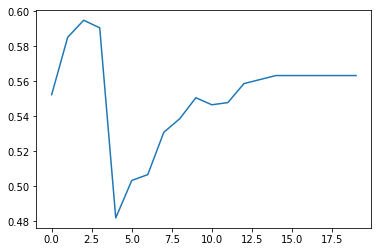

In [954]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

In [955]:
set_rf_samples(400)
m = RandomForestRegressor(n_estimators= 15, n_jobs=-1, max_features= 100, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)
reset_rf_samples()

[8.998640396061813, 7.651220518638813, 0.52221706537197021, 0.57614492154813246, 0.51554479086351779]


In [956]:
print([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

[0.55234168622733759, 0.58515459953026483, 0.5948989583575186, 0.59054072407408675, 0.4819004000073801, 0.50330438212891138, 0.50666044483825212, 0.5308402523834399, 0.5386570289633652, 0.55059306315738632, 0.54657144245861811, 0.54783481857256322, 0.55865587501767378, 0.56098336352000966, 0.5632774106179349, 0.5632774106179349, 0.5632774106179349, 0.5632774106179349, 0.5632774106179349, 0.5632774106179349]


In [957]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([  93.44095,   95.32152,   94.69908,   93.67155,   96.90162,  104.56   ,   95.85161,   95.56595,
          94.12333,   94.32945,   95.57786,   97.91269,   94.81985,   94.3945 ,   94.36465]),
 95.702307750456484,
 93.969999999999999)

In [951]:
reset_rf_samples()

#### Feature Importance

WOW!! At this point I am shocked and a litte weary that my results are to freaken good to be true because this is pretty close to what the top of the leader board was getting lets keep going to find out. 

In [959]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
306,X314,0.526441
256,X263,0.102205
123,X127,0.082637
307,X315,0.077044
254,X261,0.064705
116,X119,0.049278
115,X118,0.041258
225,X232,0.012623
73,X76,0.011199
183,X189,0.010935


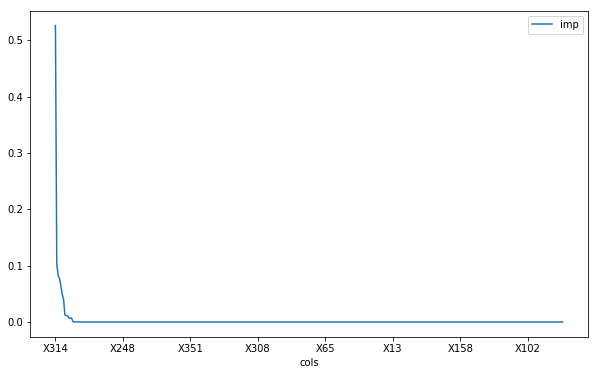

In [960]:
fi.plot('cols', 'imp', figsize=(10,6), legend = True)

In [961]:
#Function to be able to see it as a bar chart
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

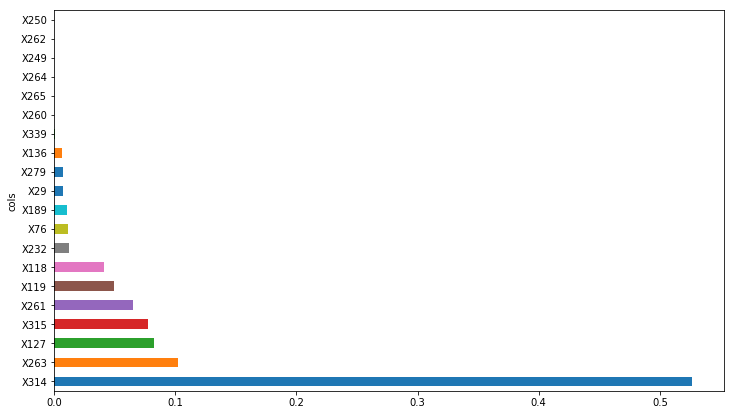

In [962]:
plot_fi(fi[:20],);

In [963]:
to_keep = fi[fi.imp > .0005].cols; len(to_keep)

14

In [964]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [965]:
set_rf_samples(400)
m = RandomForestRegressor(n_estimators= 4, n_jobs=-1, max_features= 6, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.968073495435293, 7.438647431105171, 0.52545745248965658, 0.59936959801257572, 0.51994486579739529]


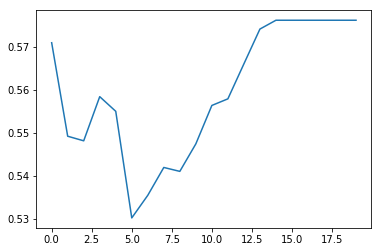

In [966]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

In [967]:
set_rf_samples(400)
m = RandomForestRegressor(n_estimators= 15, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.827704193676706, 7.275544439556521, 0.54019638231953615, 0.61674577751801996, 0.53673503098872244]


In [968]:
reset_rf_samples()

In [969]:
m = RandomForestRegressor(n_estimators= 15, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.827892440379003, 7.2365415391780505, 0.54017677191218161, 0.62084387891158588, 0.39953084266431449]


In [970]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.809652822911664, 7.298898456168723, 0.5420749226888576, 0.61428138716193881, 0.53860684298766803]


God I wish I was smarter to know what the heck is happening with this data set. This is truly interesting once we eliminate the noise fromthe other data points we see an increase, but looking at these charts is it by luck that i am getting a better RMSE. 

#### Looking for Redundant Features

In [971]:
from scipy.cluster import hierarchy as hc

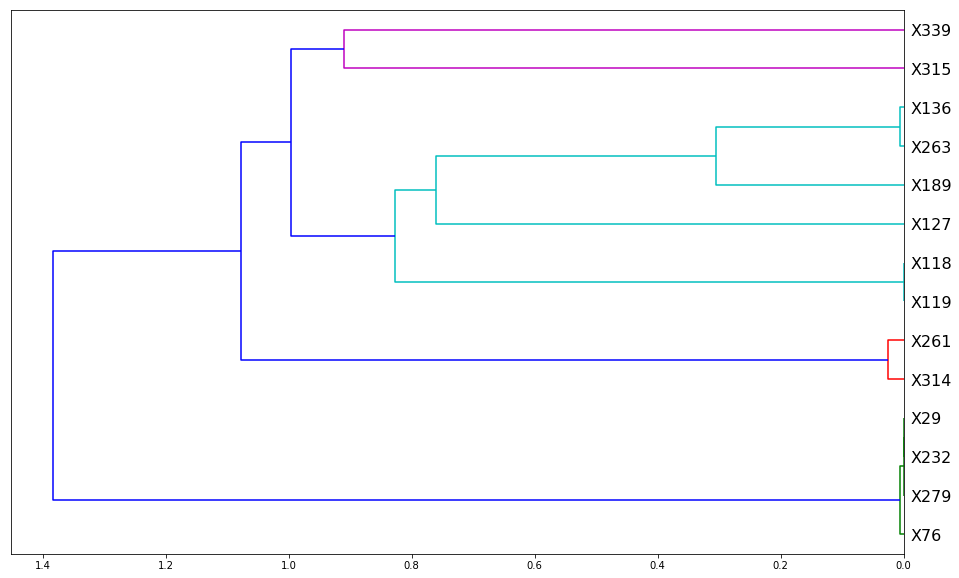

In [972]:
#using the corelation spearman rank correlation
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [973]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
    x, _ = split_vals(df_keep, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [976]:
get_oob(df_keep)

0.53842125050662593

In [975]:
df_keep.columns

Index(['X314', 'X263', 'X127', 'X315', 'X261', 'X119', 'X118', 'X232', 'X76',
       'X189', 'X29', 'X279', 'X136', 'X339'],
      dtype='object')

In [978]:
for c in (['X314', 'X263', 'X127', 'X315', 'X261', 'X119', 'X118', 'X232', 'X76',
       'X189', 'X29', 'X279', 'X136', 'X339']):
    print(c, get_oob(df_keep.drop(c, axis= 1)))

X314 0.535563143416
X263 0.539947203041
X127 0.523470521977
X315 0.518049466338
X261 0.522224219658
X119 0.536295064581
X118 0.538591112141
X232 0.535076244746
X76 0.535226688876
X189 0.537315775472
X29 0.536525375856
X279 0.537663487002
X136 0.534312701512
X339 0.537495481532


In [826]:
#to_drop = ['X119','X118', 'X136'] #'X263', 'X76' try with this too
#get_oob(df_keep.drop(to_drop, axis= 1))

0.53733836653240852

In [979]:
#df_keep.drop(to_drop, axis = 1, inplace = True)
X_train, X_valid = split_vals(df_keep, n_trn)

I re-ran didn't want to lose my results

In [981]:
np.save('tmp/keep_df_mb10_cols.npy', np.array(df_keep.columns))

In [1036]:
keep_cols = np.load('tmp/keep_df_mb10_cols.npy')
df_keep = df_trn[keep_cols]
df_keep.columns.shape

(14,)

In [ ]:
r2_score()

You can see after the redundant features were removed the first time there are for the most part no alarming redunancies, but maybe we can take 'X311', 'X119' or test them to see, which one should really be there 

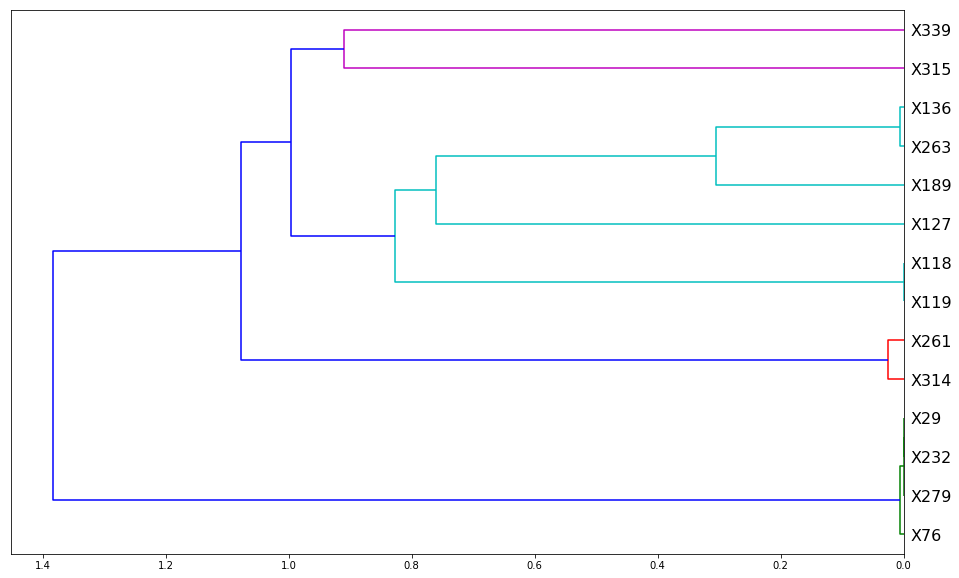

In [983]:
#using the corelation spearman rank correlation
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [830]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= 17, max_leaf_nodes= 5, oob_score=True)
    x, _ = split_vals(df_keep, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [831]:
get_oob(df_keep)

0.53038694577448375

In [832]:
for c in ('X311', 'X119'):
    print(c, get_oob(df_keep.drop(c, axis= 1)))

X311 0.506858469839
X119 0.537505977088


So much for that we didn't see that much expect at the thrid decimial point and for Kaggle that is important, but i am not really trying to win this kaggle competition and would like to keep some of my hair

#### Confidence Based on Tree Variance 

For model interpretation and for a small data set we will use them all, but if this was millions of records we could do sample of the trees using set_rf_samples() to some number. 

In [1037]:
X_train, X_valid = split_vals(df_keep, n_trn)

In [1049]:
#Current Best Model *note if we use set_rf_samples() this could get better, but I am growing annoyed of keep track a tthis point
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.824930057883769, 7.259287998162955, 0.5404853265844094, 0.61845654688422846, 0.53905930020945059]


In [988]:
fi = rf_feat_importance(m, df_keep); fi[:6]

,cols,imp
0,X314,0.582885
3,X315,0.108963
4,X261,0.065694
5,X119,0.057955
1,X263,0.037650
6,X118,0.036839


In [989]:
X_valid.shape, y_train.shape

((1262, 14), (2947,))

In [990]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 4.34 ms


(94.610836443192255, 0.21334649498258695)

In [991]:
y_train.std()

13.018518963980007

We are seeing a std of .27 of 20 estimates, which is pretty low. **NOTE** This could be huge in this industry

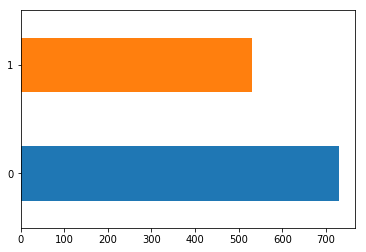

In [205]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis = 0)
x['pred'] = np.mean(preds, axis = 0)
x.X261.value_counts().plot.barh()

In [207]:
#Third most important variable has a pure split at 1 interesting. 
flds = ['X261', 'X263','X119', 'pred', 'pred_std']
x261_summ = x[flds].groupby('X261', as_index = False).mean()
x261_summ

,X261,X263,X119,pred,pred_std
0,0,0.927497,0.632011,94.866723,0.645224
1,1,1.000000,0.610169,109.862827,0.298813


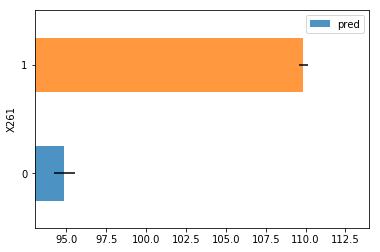

In [213]:
#lets look at the std of these 
x261_summ.plot('X261', 'pred', 'barh', xerr = 'pred_std', alpha = 0.8, xlim=(93,114));

#### One Hot End Coding 

Up until this point we haven't looked at the first variables and this probably would have just been smart to do at the begining, but oh well here we go. This really could change everything, but that might be a good thing

In [992]:
df_trn2, y_trn2, nas = proc_df(df_raw, 'y', max_n_cat = 44)
X_train, X_valid = split_vals(df_trn2, n_trn)

In [995]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.811724797435108, 7.246517776122898, 0.54185949520497079, 0.61979775526821013, 0.53938129970288584]


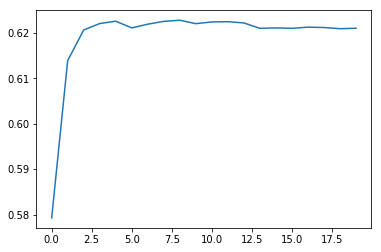

In [997]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

In [998]:
print([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis =0)) for i in range (20)])

[0.57925510109876044, 0.6138902147886256, 0.62062516610416862, 0.62203739952863146, 0.62255368661585397, 0.62107718042658633, 0.62189710213526384, 0.62252125929503577, 0.6227632243235488, 0.62201225281307626, 0.62238917977679453, 0.62244662854216903, 0.62216930153135319, 0.62098358936273224, 0.62107766257655528, 0.62098081307781539, 0.62124343136373938, 0.62116275951046496, 0.62090506511387689, 0.62100170170660174]


In [999]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .75, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.811690477374473, 7.26748143178187, 0.54186306394540362, 0.61759477774845117, 0.51256585724839487]


Interested if the sampling will & the answer seems not to be the case anymore interesting

In [1000]:
set_rf_samples(400)

In [1001]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .5, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.836055833482526, 7.402959815407199, 0.53932595652741899, 0.60320450134539805, 0.52764918438773645]


In [1002]:
set_rf_samples(300)

In [1003]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= 300, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.853773073719722, 7.3419391460203745, 0.53747670261400771, 0.60971890583719857, 0.53013959049289383]


In [1004]:
reset_rf_samples()

In [1005]:
fi = rf_feat_importance(m, df_trn2); fi[:25]

,cols,imp
299,X314,0.422628
116,X127,0.123188
247,X261,0.066069
300,X315,0.053081
125,X136,0.040385
109,X119,0.038826
108,X118,0.030219
249,X263,0.028448
66,X76,0.026158
218,X232,0.024202


In [1006]:
to_keep = fi[fi.imp > 0.005].cols; len(to_keep)

22

In [1007]:
df_keep = df_trn2[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [1008]:
X_valid.shape

(1262, 22)

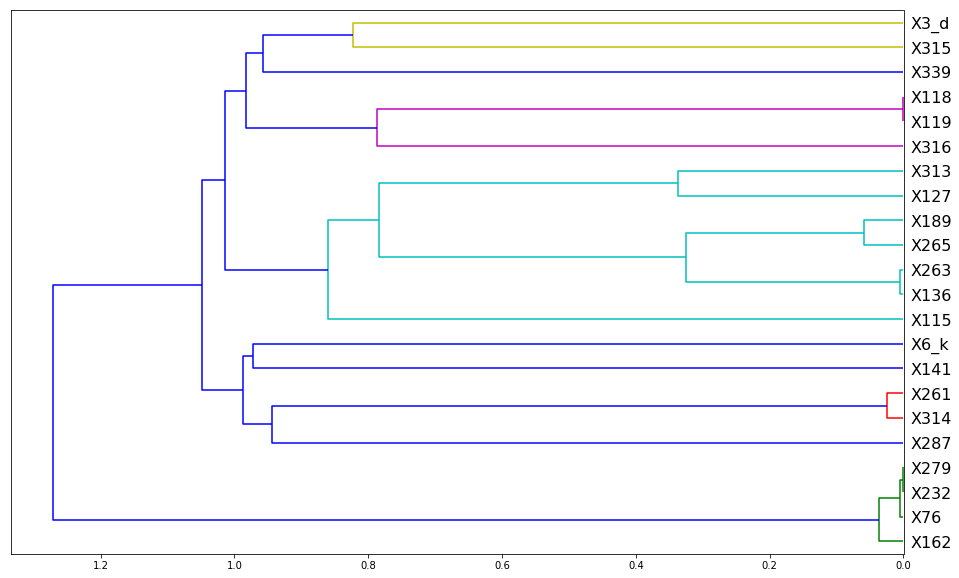

In [1009]:
#using the corelation spearman rank correlation
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [1013]:
def oob_scoref(df):
    m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
    x, _ = split(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [1014]:
get_oob(df_keep)

0.53838481976226416

In [1012]:
X_valid.columns

Index(['X314', 'X127', 'X261', 'X315', 'X136', 'X119', 'X118', 'X263', 'X76',
       'X232', 'X279', 'X313', 'X316', 'X115', 'X162', 'X339', 'X265', 'X189',
       'X141', 'X287', 'X6_k', 'X3_d'],
      dtype='object')

In [1016]:
for c in ('X314', 'X127', 'X261', 'X315', 'X136', 'X119', 'X118', 'X263', 'X76',
       'X232', 'X279', 'X313', 'X316', 'X115', 'X162', 'X265', 'X189',):
    print(get_oob(df_keep.drop(c, axis = 1)))

0.537884598147
0.538469670463
0.536766082571
0.53847253426
0.534112638498
0.500532436416
0.53584754347
0.516710386066
0.495136876847
0.533095013152
0.51499776695
0.520827069727
0.535465647148
0.537812244443
0.537007384238
0.515737196576
0.495130927216
0.538057339836
0.537994735437


In [1063]:
to_drop = ['X314'] #'X263', 'X76' try with this too
get_oob(df_keep.drop(to_drop, axis= 1))

0.4943357563683185

In [1018]:
df_keep.drop(to_drop, axis = 1, inplace = True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [1019]:
get_oob(df_keep)

0.53783771187463891

In [1020]:
df_keep.shape

(4209, 20)

looks like nothing needs to come out this time, but there are only 11 different variables for 200+ 

In [1021]:
np.save('tmp/keep_df_mb11_cols.npy', np.array(df_keep.columns))

In [1022]:
X_train.shape

(2947, 20)

In [1305]:
keep_cols = np.load('tmp/keep_df_mb11_cols.npy')
df_keep = df_trn[keep_cols]

In [1307]:
df_keep.shape

(4209, 20)

In [1308]:
X_train, X_valid = split_vals(df_keep, n_trn)

In [1309]:
df_keep.shape, X_train.shape, y_train.shape, X_valid.shape

((4209, 20), (2947, 20), (2947,), (1262, 20))

In [1310]:
m = RandomForestRegressor(n_estimators= 30, n_jobs=-1, max_features= .8, max_leaf_nodes= 7, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.75012226879857, 7.250753618993933, 0.54824279982475999, 0.6193531423637223, 0.54051789676090822]


In [1311]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,1], np.mean(preds[:,1]), y_valid[1]

(array([ 94.72005,  94.77723,  95.00967,  94.76449,  94.33809,  94.31409,  94.5228 ,  94.33102,  94.70484,
         94.95061,  94.32682,  94.78876,  94.98881,  94.94684,  94.67032,  94.60617,  94.8449 ,  94.82616,
         93.55523,  93.64438,  94.7829 ,  94.92987,  94.05347,  94.70197,  94.79437,  94.85051,  94.63458,
         94.84965,  94.54205,  93.73472]),
 94.583512966714352,
 92.049999999999997)

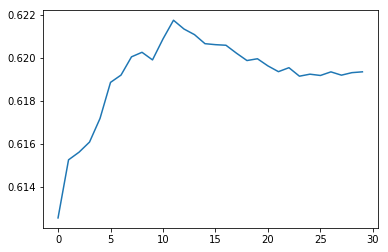

In [1312]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(30)]);

#### Tree Interpreter *Showing the contribution of each feature*

This is the intrepreter for the non-hot ended coded data

In [1028]:
from treeinterpreter import treeinterpreter as ti

**HOT ENCODING**

In [1029]:
row = X_valid.values[None,0]; row

array([[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0]], dtype=int64)

In [1030]:
prediction, bias, contributions = ti.predict(m, row)

In [1031]:
prediction[0], bias[0]

(94.806147029615843, 101.23418629114356)

In [1032]:
idxs = np.argsort(contributions[0])

In [1033]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('X314', 0, -6.0641088607189397),
 ('X315', 0, -0.66501026184182022),
 ('X261', 0, -0.64022587200100034),
 ('X127', 0, -0.32804318257010079),
 ('X339', 0, -0.0048488472418050325),
 ('X265', 0, 0.0),
 ('X162', 0, 0.0),
 ('X115', 1, 0.0),
 ('X316', 1, 0.0),
 ('X313', 0, 0.0),
 ('X287', 0, 0.0),
 ('X141', 0, 0.0),
 ('X118', 1, 0.0),
 ('X119', 0, 0.0),
 ('X76', 1, 0.05988981379235625),
 ('X189', 0, 0.064878694185141222),
 ('X279', 0, 0.1846778412234123),
 ('X232', 46, 0.20058351069153205),
 ('X136', 1, 0.31395081409462688),
 ('X263', 1, 0.45021708885889711)]

In [1034]:
contributions[0].sum()

-6.4280392615276991

In [1035]:
df_keep.shape, df_valid.shape, contributions.shape, df_raw.shape, prediction.shape, bias.shape, row.shape

((4209, 20), (1262, 20), (1, 20), (4209, 378), (1,), (1,), (1, 20))

**No Hot End Done**

In [1044]:
from treeinterpreter import treeinterpreter as ti

In [1045]:
df_train, df_valid = split_vals(df_keep[df_keep.columns], n_trn)

In [1046]:
row = X_valid.values[None,0]; row

array([[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]], dtype=int64)

In [1051]:
prediction, bias, contributions = ti.predict(m, row)

In [1052]:
prediction[0], bias[0]

(94.76177899851173, 101.23903104852391)

In [1053]:
idxs = np.argsort(contributions[0])

In [1054]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('X314', 0, -5.6981407133174864),
 ('X261', 0, -0.96539576107885661),
 ('X315', 0, -0.92629734528347707),
 ('X127', 1, -0.23894519837018038),
 ('X119', 0, 0.0),
 ('X118', 0, 0.0),
 ('X76', 0, 0.0),
 ('X339', 0, 0.0),
 ('X29', 0, 0.067736875201072883),
 ('X279', 0, 0.068671860018456959),
 ('X136', 1, 0.12576376731971878),
 ('X189', 1, 0.14041705878534713),
 ('X232', 0, 0.19045112676089246),
 ('X263', 1, 0.75848627995234419)]

In [1055]:
contributions[0].sum()

-6.4772520500121678

In [1056]:
df_keep.shape, df_valid.shape, contributions.shape, df_raw.shape, prediction.shape, bias.shape, row.shape

((4209, 14), (1262, 14), (1, 14), (4209, 378), (1,), (1,), (1, 14))

## Final Tweaks 

Skipped Partical Dependence

#### Extraploation 

In [1057]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas= proc_df(df_ext, 'is_valid')

In [1058]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
m.fit(x, y);
m.oob_score_

0.00040273775563581804

In [668]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
9,X0,0.698600
7,X189,0.159166
8,X35,0.046629
6,X127,0.034794
16,X8_t,0.021960
0,X314,0.011625
2,X261,0.010255
12,X263,0.008462
1,X315,0.004736
14,X54,0.003772


In [1059]:
df_keep.columns

Index(['X314', 'X263', 'X127', 'X315', 'X261', 'X119', 'X118', 'X232', 'X76',
       'X189', 'X29', 'X279', 'X136', 'X339'],
      dtype='object')

In [1074]:
#NOTE I TOOK X314 & X261 OUT
feats =['X263', 'X127', 'X315', 'X119', 'X118', 'X232', 'X76',
       'X189', 'X29', 'X279', 'X136', 'X339']

In [1231]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 7, oob_score=True)
m.fit(X_train, y_train);
m.oob_score_

0.53910987642775043

In [1232]:
#this is goint to take feats and make a rdf with out each one 
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 7, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

X314
[8.744163328560349, 7.256521446827403, 0.54885789466227108, 0.61874730774411346, 0.52271245022562729]
X127
[8.755472731485456, 7.260074439000938, 0.54769015633763019, 0.6183738727688699, 0.53942102993336583]
X261
[8.748261947190045, 7.265358829723772, 0.54843487127640689, 0.61781812213103393, 0.5259156833607872]
X315
[8.762925666700793, 7.280790589706773, 0.54691978771638061, 0.6161928748164095, 0.53669591820830886]
X136
[8.74628132947591, 7.255422237610569, 0.54863931797777088, 0.61886280240246694, 0.53874750517660241]
X119
[8.758322055734007, 7.2732387731251364, 0.54739571487213423, 0.61698865044241202, 0.53633539736959723]
X118
[8.746826362586132, 7.231800358693329, 0.5485830622567035, 0.62134054122131344, 0.53873823989032255]
X263
[8.74951267326072, 7.259218712348433, 0.54830574284936673, 0.61846383008411676, 0.54003222779930404]
X76
[8.744048239421943, 7.279192565020585, 0.54886977029006079, 0.61636133617908184, 0.51825860405444968]
X232
[8.749021495571078, 7.281436059314851,

In [1240]:
to_drop = ['X232']
get_oob(df_keep.drop(to_drop, axis=1))

0.53782092002136062

In [1243]:
m = RandomForestRegressor(n_estimators= 30, n_jobs=-1, max_features= .8, max_leaf_nodes= 7, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.750787442365791, 7.255038331933938, 0.54817411315711562, 0.6189031355099861, 0.54068702644561972]


### Final Model

In [1350]:
df_keep.shape, df_keep.columns

((4209, 18),
 Index(['X314', 'X127', 'X261', 'X315', 'X136', 'X119', 'X118', 'X263', 'X76',
        'X279', 'X313', 'X316', 'X115', 'X339', 'X265', 'X189', 'X141', 'X287'],
       dtype='object'))

In [1351]:
np.save('tmp/keep_df_mb13_cols.npy', np.array(df_subs.columns))

In [20]:
keep_cols = np.load('tmp/keep_df_mb13_cols.npy')
df_keep = df_trn[keep_cols]

In [1359]:
X_train, X_valid = split_vals(df_keep, n_trn)

In [32]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 20, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

NameError: name 'print_score' is not defined

In [1395]:
print([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(20)]);

[0.61254935748718153, 0.61525430796172065, 0.61561008124958749, 0.61608211853206907, 0.61718313453070617, 0.61886138429553794, 0.61920126201407033, 0.62005182668266778, 0.62026251203373717, 0.61990872124243102, 0.62088543824112263, 0.62175547773880979, 0.62134675363594816, 0.62108539516814132, 0.62066435584394453, 0.62061798371655796, 0.62059052393560321, 0.62022129129278758, 0.61987892336660833, 0.61996165992295071]


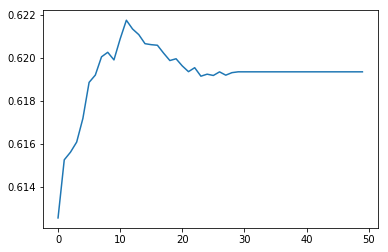

In [1396]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(50)]);

In [23]:
y_train = y_trn

In [24]:
df_test1 = pd.read_csv(f'{PATH}test.csv', low_memory=False)

In [25]:
df_test1.shape, df_raw.shape, df_keep.shape, y_train.shape

((4209, 377), (4209, 378), (4209, 19), (4209,))

In [26]:
df_test1.shape

(4209, 377)

In [27]:
df_keep.columns

Index(['X314', 'X127', 'X261', 'X315', 'X136', 'X119', 'X118', 'X263', 'X76',
       'X232', 'X279', 'X313', 'X316', 'X115', 'X162', 'X339', 'X265', 'X189',
       'X141'],
      dtype='object')

In [28]:
df_test1 = df_test1[['X314', 'X127', 'X261', 'X315', 'X136', 'X119', 'X118', 'X263', 'X76',
       'X232', 'X279', 'X313', 'X316', 'X115', 'X162', 'X339', 'X265', 'X189',
       'X141']]

In [29]:
df_test1.shape

(4209, 19)

In [30]:
y_train.shape

(4209,)

In [31]:
#This is a function that will split out data set
X_train = df_keep
y_train = y_trn
X_valid = df_test1

In [1415]:
X_train.shape, y_train.shape, X_valid.shape

((4209, 19), (4209,), (4209, 19))

In [1416]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.8, max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [1418]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 20, oob_score=True)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.8, max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [1419]:
X_train.shape

(4209, 19)

In [1420]:
y_train.shape

(4209,)

In [1421]:
y = m.predict(X_valid)

In [1120]:
y[:12,]

array([  77.93858,   94.50228,   77.93858,   77.93858,  112.36613,   94.28349,  112.36613,   94.50228,
        113.32922,   94.50228,  113.32922,  103.43309])

In [1424]:
y.shape

(4209,)

In [1425]:
df_test2 = pd.read_csv(f'{PATH}test.csv', low_memory=False)

In [1428]:
ID = np.array(df_test2['ID'])

In [1429]:
ID

array([   1,    2,    3, ..., 8413, 8414, 8416], dtype=int64)

In [1430]:
df = pd.DataFrame({'ID':ID, 'y':y})

In [1151]:
df.head()

,ID,y
0,1,77.938583
1,2,94.502281
2,3,77.938583
3,4,77.938583
4,5,112.366130


In [1431]:
df.head()

,ID,y
0,1,77.986822
1,2,94.077738
2,3,77.986822
3,4,77.986822
4,5,112.608675


# Kaggle Submission 

In [1432]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.csv',index= False)

In [1433]:
FileLink(f'{SUBM}subm.csv')

C:\Windows\System32\fastai\tmp-Python Projects\ML Projects\data\benz\subm\subm.csv

## Wanted to use the hot end code selections and i did :) 

In [1313]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas= proc_df(df_ext, 'is_valid')

In [1314]:
m = RandomForestRegressor(n_estimators= 17, n_jobs=-1, max_features= .8, max_leaf_nodes= 5, oob_score=True)
m.fit(x, y);
m.oob_score_

-0.00049620039539410854

In [1315]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
16,X265,0.176558
12,X316,0.115403
6,X118,0.101219
2,X261,0.086950
3,X315,0.084105
11,X313,0.079441
0,X314,0.077322
19,X287,0.060696
18,X141,0.044652
14,X162,0.035529


In [1316]:
df_keep.columns

Index(['X314', 'X127', 'X261', 'X315', 'X136', 'X119', 'X118', 'X263', 'X76',
       'X232', 'X279', 'X313', 'X316', 'X115', 'X162', 'X339', 'X265', 'X189',
       'X141', 'X287'],
      dtype='object')

In [1317]:
feats =['X314', 'X127', 'X261', 'X315', 'X136', 'X119', 'X118', 'X263', 'X76',
       'X232', 'X279', 'X313', 'X316', 'X115', 'X162', 'X339', 'X265', 'X189',
       'X141', 'X287']

In [1318]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 7, oob_score=True)
m.fit(X_train, y_train);
m.oob_score_

0.53988888624620635

In [1321]:
#this is goint to take feats and make a rdf with out each one 
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 7, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

X314
[8.756829393336023, 7.24397571448525, 0.54754997451775567, 0.62006445661310028, 0.51711797908575441]
X127
[8.755006685183664, 7.253139024186626, 0.5477383071859252, 0.61910264527108727, 0.53893682073201143]
X261
[8.746776731802251, 7.2439502299449625, 0.54858818505484463, 0.62006712985939805, 0.53781637024286022]
X315
[8.758466265233546, 7.278567365232788, 0.54738081010512984, 0.61642723373814245, 0.54090391306692787]
X136
[8.750086434470466, 7.248451276546828, 0.54824649997478969, 0.61959483869619103, 0.5083591307542511]
X119
[8.758583258471809, 7.260073410036454, 0.54736871809340282, 0.61837398094398788, 0.53775802282266261]
X118
[8.746850789322632, 7.268975636480791, 0.54858054096325837, 0.61743751544931136, 0.53737306785515671]
X263
[8.766972692427418, 7.274309648729111, 0.54650119448354584, 0.61687585675644607, 0.53638497653135486]
X76
[8.748886472002855, 7.264573717269635, 0.54837039591079773, 0.61790071668602109, 0.53809746513353329]
X232
[8.752210561580831, 7.2674338494571

In [1325]:
to_drop = ['X162','X232']
get_oob(df_keep.drop(to_drop, axis=1))

0.53920273989040146

In [1326]:
df_keep.drop(to_drop, axis = 1, inplace = True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [1327]:
m = RandomForestRegressor(n_estimators= 20, n_jobs=-1, max_features= .8, max_leaf_nodes= 7, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[8.743493762469285, 7.275637879922125, 0.54892698255083539, 0.61673593312907249, 0.53879567542259665]
